[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andresfcm97/ia4eng_afcm_eac_proyecto/blob/main/Entrega_2.ipynb)

# 1. Importamos librerías que vamos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split

# 2. Cargamos los archivos que se van a utilizar

In [ ]:
entrenamiento = pd.read_csv("train.csv")
prueba = pd.read_csv("test.csv")

In [ ]:
entrenamiento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




```
# Tiene formato de código
```

Nos informamos de las dimensiones de nuestros DataFrames

In [ ]:
print(f"Dimensión train.csv: {entrenamiento.shape}\nDimensión test.csv: {prueba.shape}")

Dimensión train.csv: (1460, 81)
Dimensión test.csv: (1459, 80)


Ya que el DataFrame en el que más nos enfocaremos es en el de entrenamiento, es necesario informarse sobre si tiene o no algunas columnas con valores nulos, puesto que, después de verificar las variables que se tendrán presentes para el modelo, habrá que eliminar los datos nulos que contengan.

In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
entrenamiento.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Tal como se pudo observar, el archivo train.csv cuenta con 1460 filas y 81 columnas, el objetivo será predecir el precio de venta de las casas, es decir, la columna "SalePrice", para esto, tendremos que mirar cuáles variables se relacionan con nuestra variable de interés (SalePrice), y elegir las que tengan mayor relación.

# 3. Análisis de datos

## 3.1. Reduciendo variables

Ya que la variable que se intentará predecir es "SalePrice", nos informaremos sobre ella usando el método describe(), el cual, me entrega datos reelevantes, como lo son: Cantidad de datos, promedio, desviación estándar, etc.

In [ ]:
entrenamiento["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Ya que la variable que nos interesa analizar es el precio de venta "SalePrice", verificaremos que no tenga valores vacíos, en caso tal de que los haya, los removeremos. Para verificar esto, usaremos el método isna() en la columna SalePrice y sumaremos todos los valores, si el valor da cero, no hay ningún valor vacío.

In [ ]:
entrenamiento["SalePrice"].isna().sum()

0

Como el valor dio cero, tal como se había dicho, no hay celdas vacías en esta columna.

Para ver la forma de los datos del precio de venta de las casas, procedemos a graficar un histograma

Text(0.5, 1.0, 'SalePrice Histogram')

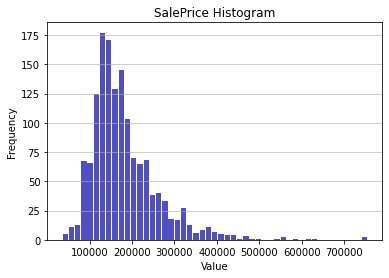

In [ ]:
plt.hist(x=entrenamiento['SalePrice'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SalePrice Histogram')

Ya que hay muchas variables en este ejercicio, procederemos a ver las variables que tengan una mayor correlación con SalePrice, para así, tener a estas en cuenta a la hora de proceder al entrenamiento para predecir el precio. Para ver la correlación de las variables, crearemos una matriz de correlación.

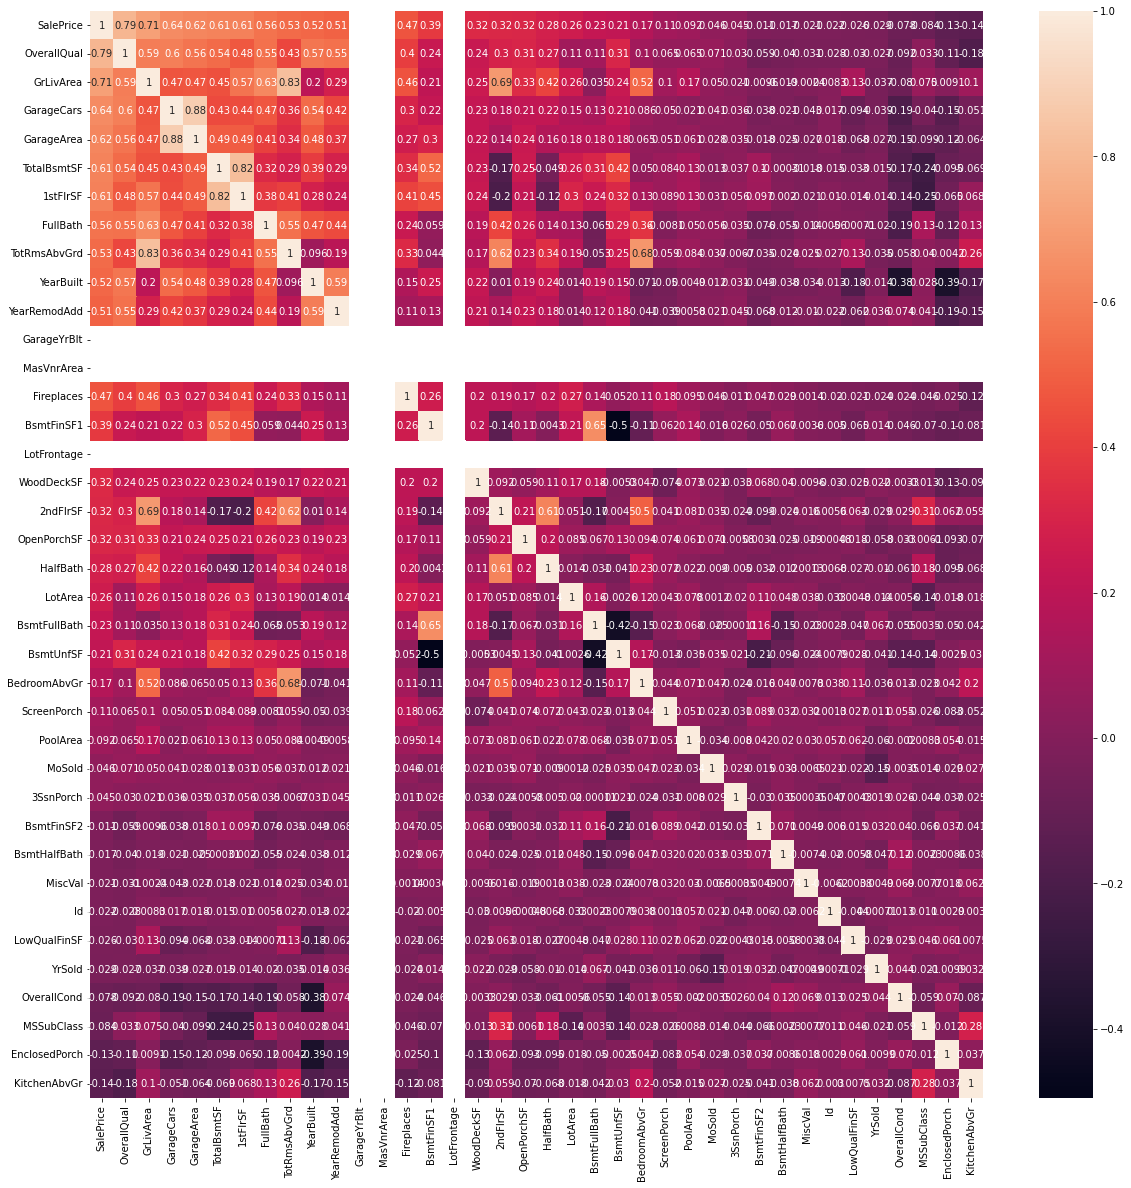

In [ ]:
plt.figure(figsize = (20, 20))
# La siguiente función calcula la correlación por pares de columnas excluyendo NA/Valores nulos
correlacion = entrenamiento.corr()
num_var = 81 # Número de variables que se van a mostrar en la matriz de correlación
# La función nlargest se usa para obtener las primeras n filas ordenadas por columnas en orden descendente, como en
# este caso sólo nos interesan los nombres de las filas de la columna SalePrice, nos paramos en dicha columna y sa-
# camos el índice que es en donde se guarda el nombre de las filas
columnas = correlacion.nlargest(num_var, 'SalePrice')['SalePrice'].index

# La función corrcoef() retorna una matriz con los coeficientes de la correlación de Pearson de los datos ingresados, en este 
# caso, fue necesario transponer la matriz, ya que los datos que contienen las columnas son realmente los datos de
# las filas. Los coeficientes de correlación de Pearson oscilan entre -1 y 1, los valores positivos indican una correlación
# positiva (entre más cercano sea el valor a 1, mayor es la correlación entre estas) y los valores negativos indican una
# correlación negativa o inversa, si el valor da 0, o cerca a él, indica que no existe una relación lineal entre dichas
# variables.
datos_matriz = np.corrcoef(entrenamiento[columnas].values.T)

# annot sirve para colocar los datos dentro del mapa, tanto los nombres de los datos del eje x, como del y, son los mismos.
matriz = sns.heatmap(datos_matriz, annot=True, yticklabels=columnas.values, xticklabels=columnas.values)
plt.show()

Aquí podemos observar los valores de los coeficientes correlación de Pearson correspondientes a la columna "SalePrice"

In [ ]:
coefi_correla = correlacion['SalePrice'].sort_values(ascending=False)
coefi_correla

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

La siguiente variable almacena el nivel de correlación positivo mínimo para ser tenido en consideración

In [ ]:
correla_aceptable = 0.3

In [ ]:
columnas_nuevo = correlacion[correlacion['SalePrice'] > correla_aceptable].index
columnas_entrenamiento = [i for i in columnas_nuevo]
columnas_prueba = [columnas_nuevo[i] for i in range(len(columnas_nuevo) - 1)]

df_entrenamiento = entrenamiento[columnas_entrenamiento]
df_prueba = prueba[columnas_prueba]

En la siguiente función, se muestra el gráfico de la variable SalePrice junto con las variables que más se correlacionan a ella, tal como se puede observar, todas estas presentan una correlación positiva, es decir, si una de las variables aumenta, la otra también lo hace

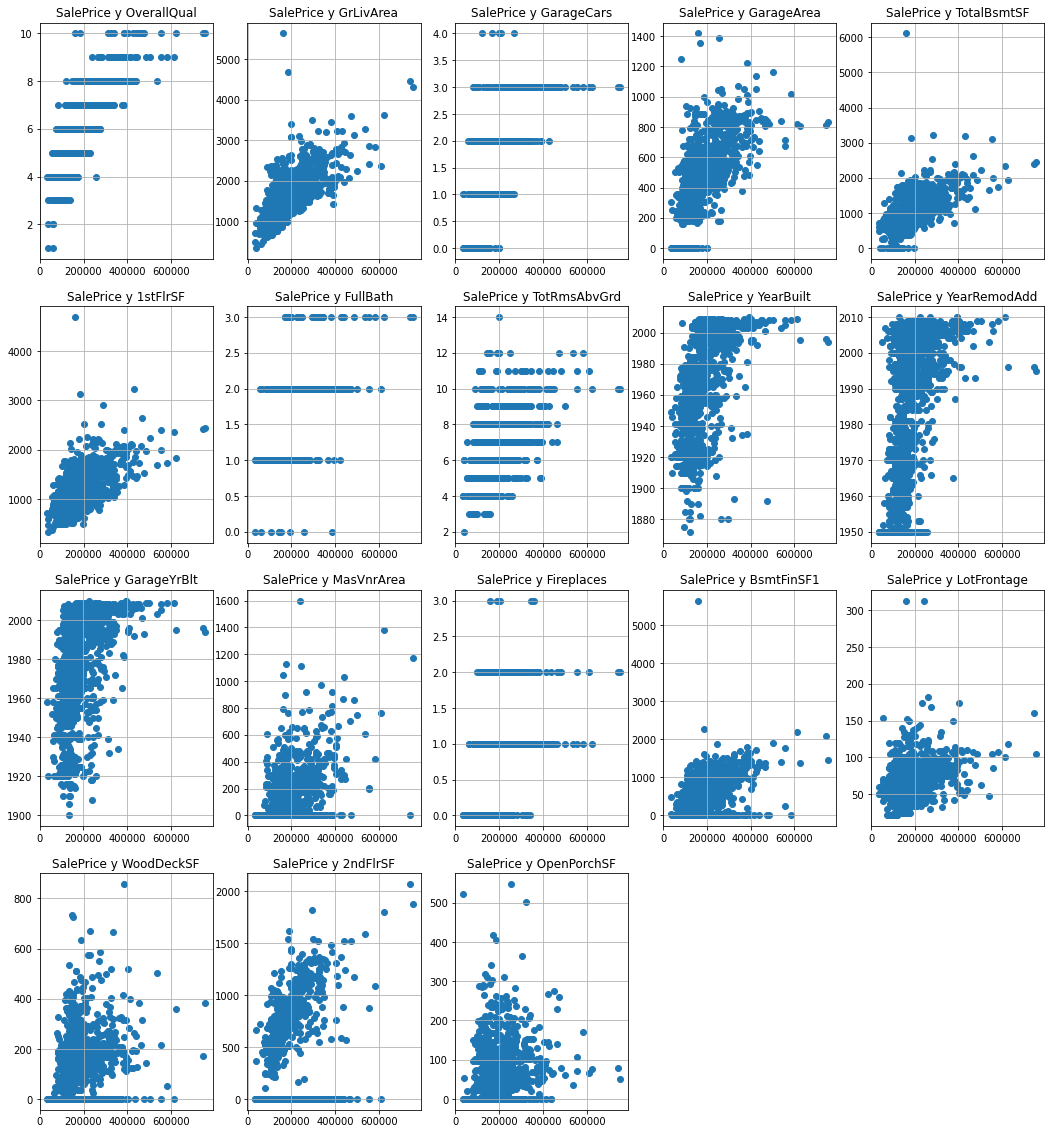

In [ ]:
# La siguiente línea da los mismos datos de columnas_nuevo, pero entregados de mayor a menos coeficiente de Pearson
datos_grafi = coefi_correla[coefi_correla > correla_aceptable].index
figura = plt.figure(figsize = (18,20))
figura.tight_layout() # Para que el espaciado entre las figuras sea más que suficiente
for i in range(1,len(datos_grafi)):
    ax = plt.subplot(4,5,i)
    plt.scatter(entrenamiento['SalePrice'], entrenamiento[datos_grafi[i]])
    plt.title('SalePrice y '+datos_grafi[i])
    plt.grid()

## 3.1.2. Eliminando y rellenando datos vacíos

Lo primero que vamos a realizar es crear una tabla en donde se informe de cuáles columnas cuentan con datos vacíos y el porcentaje que representa dicho valor, esto con el fin de considerar si eliminar la variable o rellenarla con datos ya existentes, en cualquier caso, se analizarán tres posibles resultados, el primero de ellos eliminando todos los datos nulos, el segundo, llenando todos los datos nulos con el promedio correspondiente de su columna y el último rellenando los datos con valores aleatorios, haciendo uso de alguna distribución de probabilidad

In [ ]:
total = df_entrenamiento.isnull().sum().sort_values(ascending=False)
porcentaje = (100*df_entrenamiento.isnull().sum()/df_entrenamiento.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes.head(10)

,Cant. Nulos,Porcentaje [%]
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


### 3.1.2.1. Eliminando todas las columnas que tengan valores nulos

In [ ]:
df_entrenamiento_1 = df_entrenamiento.drop((datos_faltantes[datos_faltantes['Cant. Nulos'] > 0]).index,1)
df_prueba_1 = df_prueba.drop((datos_faltantes[datos_faltantes['Cant. Nulos'] > 0]).index,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
total = df_entrenamiento_1.isnull().sum().sort_values(ascending=False)
porcentaje = (100*df_entrenamiento_1.isnull().sum()/df_entrenamiento_1.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes.head(10)

,Cant. Nulos,Porcentaje [%]
OverallQual,0,0.0
YearBuilt,0,0.0
YearRemodAdd,0,0.0
BsmtFinSF1,0,0.0
TotalBsmtSF,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
GrLivArea,0,0.0
FullBath,0,0.0
TotRmsAbvGrd,0,0.0


### 3.1.2.2. Eliminando las columnas que tengan gran porcentaje de valores nulos y llenando las otras con el promedio de las mismas

In [ ]:
total = df_entrenamiento.isnull().sum().sort_values(ascending=False)
porcentaje = (100*df_entrenamiento.isnull().sum()/df_entrenamiento.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes.head(10)

,Cant. Nulos,Porcentaje [%]
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


Como se puede observar, la única variable que tiene gran cantidad de valores nulos es LotFrontage, por tanto, esta es la que eliminaremos y las otras las llenaremos con el promedio de los demás datos

In [ ]:
df_entrenamiento_2 = df_entrenamiento.drop((datos_faltantes[datos_faltantes['Cant. Nulos'] > 100]).index,1)

total = df_entrenamiento_2.isnull().sum().sort_values(ascending=False)
porcentaje = (100*df_entrenamiento_2.isnull().sum()/df_entrenamiento_2.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Cant. Nulos,Porcentaje [%]
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
OverallQual,0,0.000000
TotRmsAbvGrd,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
FullBath,0,0.000000


In [ ]:
df_entrenamiento_2['GarageYrBlt'] = df_entrenamiento_2['GarageYrBlt'].fillna(df_entrenamiento_2['GarageYrBlt'].mean())
df_entrenamiento_2['MasVnrArea'] = df_entrenamiento_2['MasVnrArea'].fillna(df_entrenamiento_2['MasVnrArea'].mean())

In [ ]:
total_prueba = df_prueba.isnull().sum().sort_values(ascending=False)
porcentaje_prueba = (100*df_prueba.isnull().sum()/df_prueba.isnull().count()).sort_values(ascending=False)
datos_faltantes_prueba = pd.concat([total_prueba, porcentaje_prueba], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes_prueba.head(10)

,Cant. Nulos,Porcentaje [%]
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
MasVnrArea,15,1.028101
GarageArea,1,0.068540
BsmtFinSF1,1,0.068540
TotalBsmtSF,1,0.068540
GarageCars,1,0.068540
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [ ]:
df_prueba_2 = df_prueba.drop((datos_faltantes_prueba[datos_faltantes_prueba['Cant. Nulos'] > 100]).index,1)

total_prueba = df_prueba_2.isnull().sum().sort_values(ascending=False)
porcentaje_prueba = (100*df_prueba_2.isnull().sum()/df_prueba_2.isnull().count()).sort_values(ascending=False)
datos_faltantes_prueba = pd.concat([total_prueba, porcentaje_prueba], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes_prueba.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Cant. Nulos,Porcentaje [%]
GarageYrBlt,78,5.346127
MasVnrArea,15,1.028101
BsmtFinSF1,1,0.068540
TotalBsmtSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
OverallQual,0,0.000000
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [ ]:
df_prueba_2['GarageYrBlt'] = df_prueba_2['GarageYrBlt'].fillna(df_prueba_2['GarageYrBlt'].mean())
df_prueba_2['MasVnrArea'] = df_prueba_2['MasVnrArea'].fillna(df_prueba_2['MasVnrArea'].mean())
df_prueba_2['BsmtFinSF1'] = df_prueba_2['BsmtFinSF1'].fillna(df_prueba_2['BsmtFinSF1'].mean())
df_prueba_2['TotalBsmtSF'] = df_prueba_2['TotalBsmtSF'].fillna(df_prueba_2['TotalBsmtSF'].mean())
df_prueba_2['GarageArea'] = df_prueba_2['GarageArea'].fillna(df_prueba_2['GarageArea'].mean())
df_prueba_2['GarageCars'] = df_prueba_2['GarageCars'].fillna(df_prueba_2['GarageCars'].mean())

### 3.1.2.3. Eliminando columnas que tengan muchos datos nulos y rellenando columnas que tengan pocos haciendo uso de la distribución lognormal

La siguiente función se encarga de rellenar los datos faltantes del dataframe con la distribución lognormal

In [ ]:
def fillna(df,nombre):
    df = df.copy()
    valores = np.random.lognormal(df[nombre].mean(), df[nombre].std(), len(df[df[nombre].isna()==True]))
    dna = df[nombre].isna()
    indice = df.index
    cont1 = 0
    for cont, i in enumerate(dna):
        if i:
            df[nombre][int(indice[cont])] = valores[cont1]
            cont1 += 1
    result = df
    return result

En escencia, realizamos lo mismo que para el caso anterior, pero en vez de llenar todos los datos con el promedio de su columna respectiva, se llena con los datos entregados por la función creada

In [ ]:
total = df_entrenamiento.isnull().sum().sort_values(ascending=False)
porcentaje = (100*df_entrenamiento.isnull().sum()/df_entrenamiento.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes.head(10)

,Cant. Nulos,Porcentaje [%]
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [ ]:
df_entrenamiento_3 = df_entrenamiento.drop((datos_faltantes[datos_faltantes['Cant. Nulos'] > 100]).index,1)

total = df_entrenamiento_3.isnull().sum().sort_values(ascending=False)
porcentaje = (100*df_entrenamiento_3.isnull().sum()/df_entrenamiento_3.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Cant. Nulos,Porcentaje [%]
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
OverallQual,0,0.000000
TotRmsAbvGrd,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
FullBath,0,0.000000


In [ ]:
df_entrenamiento_3 = fillna(df_entrenamiento_3, 'GarageYrBlt')
df_entrenamiento_3 = fillna(df_entrenamiento_3, 'MasVnrArea')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
total_prueba = df_prueba.isnull().sum().sort_values(ascending=False)
porcentaje_prueba = (100*df_prueba.isnull().sum()/df_prueba.isnull().count()).sort_values(ascending=False)
datos_faltantes_prueba = pd.concat([total_prueba, porcentaje_prueba], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes_prueba.head(10)

,Cant. Nulos,Porcentaje [%]
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
MasVnrArea,15,1.028101
GarageArea,1,0.068540
BsmtFinSF1,1,0.068540
TotalBsmtSF,1,0.068540
GarageCars,1,0.068540
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [ ]:
df_prueba_3 = df_prueba.drop((datos_faltantes_prueba[datos_faltantes_prueba['Cant. Nulos'] > 100]).index,1)

total_prueba = df_prueba_3.isnull().sum().sort_values(ascending=False)
porcentaje_prueba = (100*df_prueba_3.isnull().sum()/df_prueba_3.isnull().count()).sort_values(ascending=False)
datos_faltantes_prueba = pd.concat([total_prueba, porcentaje_prueba], axis=1, keys=['Cant. Nulos', 'Porcentaje [%]'])
datos_faltantes_prueba.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Cant. Nulos,Porcentaje [%]
GarageYrBlt,78,5.346127
MasVnrArea,15,1.028101
BsmtFinSF1,1,0.068540
TotalBsmtSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
OverallQual,0,0.000000
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [ ]:
df_prueba_3 = fillna(df_prueba_3, 'GarageYrBlt')
df_prueba_3 = fillna(df_prueba_3, 'MasVnrArea')
df_prueba_3 = fillna(df_prueba_3, 'BsmtFinSF1')
df_prueba_3 = fillna(df_prueba_3, 'TotalBsmtSF')
df_prueba_3 = fillna(df_prueba_3, 'GarageArea')
df_prueba_3 = fillna(df_prueba_3, 'GarageCars')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## 3.2. Normalización

Tal como se verá a continuación, los datos de la columna SalePrice de nuestro DataFrame, no se pueden representar mediante una distribución de probabilidad normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


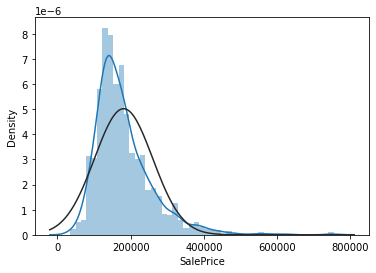

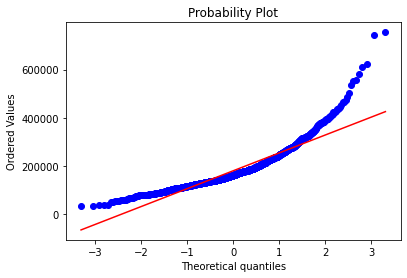

In [ ]:
sns.distplot(df_entrenamiento_3['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_entrenamiento_3['SalePrice'], plot=plt)

Como se puede observar en el gráfico de probabilidad, los datos de la columna SalePrice del DataFrame (gráfico azul), no sigue la distribución de probabilidad normal (gráfico rojo), por tanto, para tener un mejor entrenamiento de la variable, debemos encontrar una distribución que represente bien el comportamiento de los datos. En la [siguiente página](https://www.cienciasinseso.com/transformacion-de-datos/#:~:text=Por%20eso%20la%20transformaci%C3%B3n%20logar%C3%ADtmica,ajuste%20mejor%20a%20una%20normal.) se encuentra que para transformar distribuciones con sesgo positivo (como es nuestro caso), la transformación logarítmica es la más usada, puesto que en la escala logarítmica, la distancia es exactamente la misma entre 1 y 10 que entre 10 y 100 o 100 y 1000, etc. Lo que resulta en que la parte izquierda se expandirá, mientras que la parte derecha se comprimirá, lo que favorecerá a la curva resultante para que se ajuste mejor a una normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


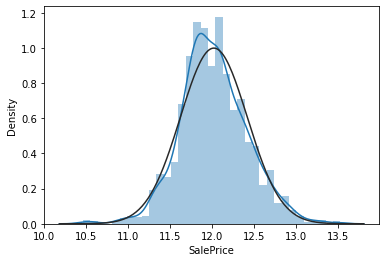

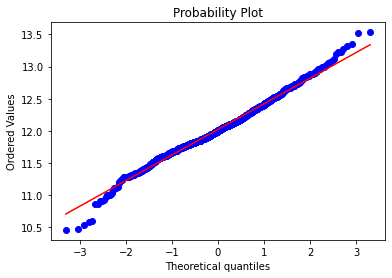

In [ ]:
df_entrenamiento_3['SalePrice'] = np.log(df_entrenamiento_3['SalePrice'])
sns.distplot(df_entrenamiento_3['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_entrenamiento_3['SalePrice'], plot=plt)

# 3.3. Variables Dummies

En la [siguiente página](https://virtual.uptc.edu.co/ova/estadistica/docs/libros/2007315/lecciones_html/capitulo_7/leccion0/introduccion.html) se habla acerca de lo que son las variables Dummies o indicadoras, las cuales sirven para identificar las categorías a las cuales pertenecen las observaciones, estas variables pueden tomar valores de 0 o de 1. Por tanto, transformaremos el DataFrame que se tiene en el momento a variables Dummies

In [ ]:
df_entrenamiento_3 = pd.get_dummies(df_entrenamiento_3)
df_prueba_3 = pd.get_dummies(df_prueba_3)

Ahora verificaremos si quedó algún dato faltante

In [ ]:
datos_na = (df_prueba_3.isnull().sum() / len(df_prueba_3)) * 100
datos_na = datos_na.drop(datos_na[datos_na == 0].index).sort_values(ascending=False)
datos_faltantes = pd.DataFrame({'Porcentaje Faltante' :datos_na})
datos_faltantes.head()

,Porcentaje Faltante


Tal como podemos observar, ya no hay ningún dato faltante, por lo que ya podemos proceder a hacer el entrenamiento de la variable

In [ ]:
y_train = df_entrenamiento_3.SalePrice.values
df_entrenamiento_3.drop("SalePrice", axis = 1, inplace = True)
test_pct = 0.2
# Con la siguiente línea, de los datos df_entrenamiento_3 y de y_train, serán divididos aleatoriamente de
# tal forma que el 20% correspondrá a test y el 80% a train
X_train, X_test, y_train, y_test = train_test_split(df_entrenamiento_3, y_train, test_size=test_pct)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1168, 17) (292, 17)
(1168,) (292,)
